<p style="text-align:center">
   </p>

<h1 align="center"><font size="5">Projeto Final: Classificação com Python</font></h1>

## Previsão de chuva na Austrália

In [25]:
# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn import preprocessing

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm

In [6]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix, accuracy_score
import sklearn.metrics as metrics

### Importar o Dataset

In [8]:
df = pd.read_csv("Weather_Data.csv")

In [10]:
df.head()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2/1/2008,19.5,22.4,15.6,6.2,0.0,W,41,S,SSW,...,92,84,1017.6,1017.4,8,8,20.7,20.9,Yes,Yes
1,2/2/2008,19.5,25.6,6.0,3.4,2.7,W,41,W,E,...,83,73,1017.9,1016.4,7,7,22.4,24.8,Yes,Yes
2,2/3/2008,21.6,24.5,6.6,2.4,0.1,W,41,ESE,ESE,...,88,86,1016.7,1015.6,7,8,23.5,23.0,Yes,Yes
3,2/4/2008,20.2,22.8,18.8,2.2,0.0,W,41,NNE,E,...,83,90,1014.2,1011.8,8,8,21.4,20.9,Yes,Yes
4,2/5/2008,19.7,25.7,77.4,4.8,0.0,W,41,NNE,W,...,88,74,1008.3,1004.8,8,8,22.5,25.5,Yes,Yes


### Processamento dos Dados

In [30]:
df_sydney_processed = pd.get_dummies(data=df, columns=['RainToday', 'WindGustDir', 'WindDir9am', 'WindDir3pm'])

In [32]:
df_sydney_processed.replace(['No', 'Yes'], [0,1], inplace=True)

### Dados de treinamento e dados de teste

In [35]:
df_sydney_processed.drop('Date', axis=1, inplace=True)

In [36]:
df_sydney_processed = df_sydney_processed.astype(float)

In [37]:
features = df_sydney_processed.drop(columns='RainTomorrow', axis=1)
Y = df_sydney_processed['RainTomorrow']

### Linear Regression

Usando a função train_test_split para dividir os dataframes features e Y com um test_size de 0,2 e o random_state definido como 10.

In [88]:
x_train, x_test, y_train, y_test = train_test_split(features, Y, test_size=0.2, random_state=10)

Criando e treinando um modelo de regressão linear chamado LinearReg usando os dados de treinamento (x_train, y_train)

In [41]:
LinearReg = LinearRegression()
LinearReg.fit(x_train, y_train)

LinearRegression()

Agora usando o método de previsão nos dados (predict) de teste (x_test) e salvar nas previsões do array.

In [58]:
predictions = LinearReg.predict(x_test)

Usandondo as previsões e o dataframe y_test, calcular o valor de cada métrica usando a função apropriada.

In [50]:
LinearRegression_MAE  = metrics.mean_absolute_error(y_test, predictions)
LinearRegression_MSE  = metrics.mean_squared_error(y_test, predictions)
LinearRegression_R2   = metrics.r2_score(y_test, predictions)

Apresentar o MAE, MSE e R2 em formato tabular usando quadro de dados para o modelo linear.

In [52]:
Report = pd.DataFrame({
    'Metric': ['MAE', 'MSE', 'R²'],
    'Value': [LinearRegression_MAE, LinearRegression_MSE, LinearRegression_R2]
})

print(Report)

  Metric     Value
0    MAE  0.256325
1    MSE  0.115723
2     R²  0.427119


### KNN

Agora será criado e treinado um modelo KNN usando os dados de treinamento (x_train, y_train) com o parâmetro n_neighbors definido como 4.

In [54]:
KNN = KNeighborsClassifier(n_neighbors=4).fit(x_train, y_train)
KNN

KNeighborsClassifier(n_neighbors=4)

Agora usando o método de previsão nos dados de teste (x_test) e salve-o nas predictions como array.

In [68]:
x_test = preprocessing.StandardScaler().fit(x_test).transform(x_test.astype(float))

In [69]:
predictions = KNN.predict(x_test)

Usando as previsões e o dataframe y_test, calcule o valor de cada métrica usando a função apropriada.

In [82]:
KNN_Accuracy_Score = metrics.accuracy_score(y_test, predictions)
KNN_JaccardIndex = jaccard_score(y_test, predictions, pos_label=0)
KNN_F1_Score = f1_score(y_test, predictions,  average='micro')

In [83]:
Report = pd.DataFrame({
    'Metric': ['Accuracy_Score', 'JaccardIndex', 'F1_Score'],
    'Value': [KNN_Accuracy_Score, KNN_JaccardIndex, KNN_F1_Score]
})

print(Report)

           Metric     Value
0  Accuracy_Score  0.719084
1    JaccardIndex  0.719084
2        F1_Score  0.719084


### Decision Tree

Criar e treinar um modelo de árvore de decisão chamado Tree usando os dados de treinamento (x_train, y_train).

In [86]:
Tree = DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [90]:
Tree.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

Agora usando o método de previsão nos dados de teste (x_test) e salve-o nas predictions como array.

In [91]:
predictions = Tree.predict(x_test)

Usando as previsões e o dataframe y_test, calcule o valor de cada métrica usando a função apropriada.

In [92]:
Tree_Accuracy_Score = metrics.accuracy_score(y_test, predictions)
Tree_JaccardIndex = jaccard_score(y_test, predictions, pos_label=0)
Tree_F1_Score = f1_score(y_test, predictions, average='micro')

In [93]:
Report = pd.DataFrame({
    'Metric': ['Accuracy_Score', 'JaccardIndex', 'F1_Score'],
    'Value': [Tree_Accuracy_Score, Tree_JaccardIndex, Tree_F1_Score]
})

print(Report)

           Metric     Value
0  Accuracy_Score  0.818321
1    JaccardIndex  0.781651
2        F1_Score  0.818321


Vamos visualizar a árvore

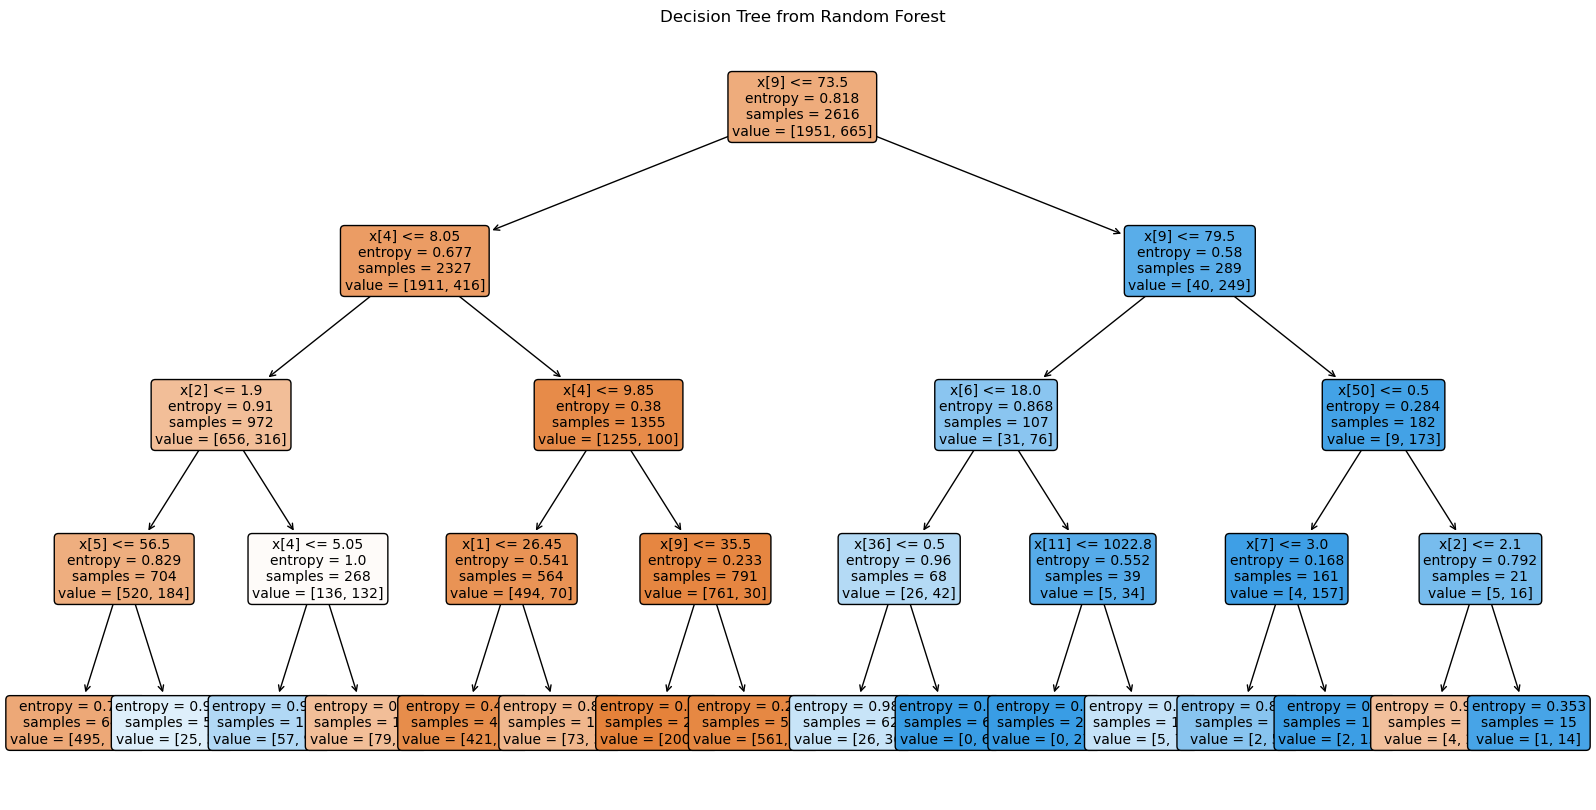

In [94]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt


# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(Tree, 
          filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree from Random Forest")
plt.show()

### Logistic Regression

Usando a função train_test_split para dividir os recursos e os dataframes Y com um test_size de 0,2 e o random_state definido como 1.

In [95]:
x_train, x_test, y_train, y_test = train_test_split(features, Y, test_size=0.2, random_state=1)

Criar e treinar um modelo LogisticRegression chamado LR usando os dados de treinamento (x_train, y_train) com o parâmetro do solucionador definido como liblinear.

In [96]:
LR = LogisticRegression(solver='liblinear').fit(x_train, y_train)
LR

LogisticRegression(solver='liblinear')

Agora, usando os métodos predizer e predizer_proba nos dados de teste (x_test) e salve-os como 2 matrizes predictions e predict_proba.

In [99]:
predictions = LR.predict(x_test)

In [100]:
predict_proba = LR.predict_proba(x_test)

Usando os dataframe predictions, predict_proba e o dataframe y_test calcule o valor de cada métrica usando a função apropriada.

In [104]:
LR_Accuracy_Score = metrics.accuracy_score(y_test, predictions)
LR_JaccardIndex = jaccard_score(y_test, predictions, pos_label=0)
LR_F1_Score = f1_score(y_test, predictions, average='micro')
LR_Log_Loss = log_loss(y_test, predict_proba)

In [105]:
Report = pd.DataFrame({
    'Metric': ['Accuracy_Score', 'JaccardIndex', 'F1_Score', 'Log_Loss'],
    'Value': [LR_Accuracy_Score, LR_JaccardIndex, LR_F1_Score, LR_Log_Loss]
})

print(Report)

           Metric     Value
0  Accuracy_Score  0.833588
1    JaccardIndex  0.800366
2        F1_Score  0.833588
3        Log_Loss  0.381150


matriz de confusão

Confusion matrix, without normalization
[[109  73]
 [ 36 437]]


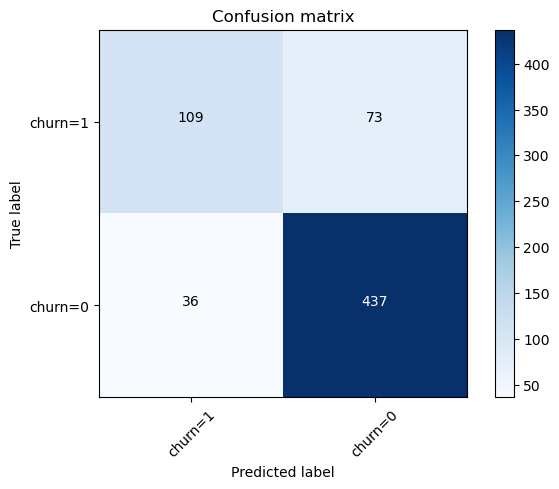

In [108]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, predictions, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

### SVM

Criar e treinar um modelo SVM chamado SVM usando os dados de treinamento (x_train, y_train).

In [109]:
SVM = svm.SVC(kernel='rbf')
SVM.fit(x_train, y_train)

SVC()

Agora usando o método de previsão nos dados de teste (x_test) e salve-o  nas predictions como array.

In [110]:
predictions = SVM.predict(x_test)

Usando as previsões e o dataframe y_test, calcule o valor de cada métrica usando a função apropriada.

In [111]:
SVM_Accuracy_Score = metrics.accuracy_score(y_test, predictions)
SVM_JaccardIndex = jaccard_score(y_test, predictions, pos_label=0)
SVM_F1_Score = f1_score(y_test, predictions, average='micro' )

In [112]:
Report = pd.DataFrame({
    'Metric': ['Accuracy_Score', 'JaccardIndex', 'F1_Score'],
    'Value': [SVM_Accuracy_Score, SVM_JaccardIndex, SVM_F1_Score]
})

print(Report)

           Metric     Value
0  Accuracy_Score  0.722137
1    JaccardIndex  0.722137
2        F1_Score  0.722137
